# Model Diagnostics

In order to look at model diagnostics with `scikit-learn`, we will return to the polynomial fitting we did on airfare prediction in one of the lessons last week. We begin by creating quadratic, cubic, and quartic terms for distance.

In [1]:
import io
import pandas as pd
fare_data = pd.read_csv('linreg_airfare_univariate.csv')
fare_data['Distance^2'] = fare_data['Distance']**2
fare_data['Distance^3'] = fare_data['Distance']**3
fare_data['Distance^4'] = fare_data['Distance']**4

We retain the same split of old and new fare data, but with our new understanding of training and validation sets.

In [2]:
fare_data_train = fare_data.iloc[[1,3,5,7,9],:].copy()
fare_data_validate = fare_data.iloc[[0,2,4,6,8],:].copy()

We also once again write a function for training a linear regression model and plotting training and validation data. This time, however, we print the mean squared error – in other words, the error function per observation –  on the plot for both training and validation data.

In [3]:
#load plotting library and numerical library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def fit_and_plot(X_train,y_train,X_val,y_val,fare_data_train,fare_data_validate): 
  #train create and train model  
  model = LinearRegression()
  model.fit(X_train, y_train)

  #plot old raw data
  plt.scatter(x=fare_data_train['Distance'], y=fare_data_train['Fare'])
  plt.title('Train Error/Obs %s, CV Error/Obs %s' %  
            (round(metrics.mean_squared_error(y_train, model.predict(X_train)),2),
            (round(metrics.mean_squared_error(y_val, model.predict(X_val)),2))))
  plt.xlabel('Distance (Miles)')
  plt.ylabel('Fare (Dollars)')

  #plot new raw data
  plt.scatter(x=fare_data_validate['Distance'], y=fare_data_validate['Fare'],color="green")  
  
  return model

Next, similarly to the feature selection process, we separate features and outcomes, and pass training and validation data to our plotting function to create a simple linear model.

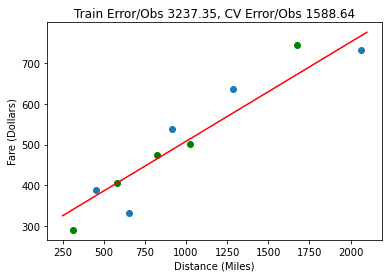

In [4]:
#simple linear fit from before
X_train = fare_data_train[['Distance']]
y_train = fare_data_train.Fare

X_val = fare_data_validate[['Distance']]
y_val = fare_data_validate.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,X_val,y_val,fare_data_train,fare_data_validate)

#plot linear fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x 
plt.plot(new_x,new_y,color="red")
plt.show()

We can see we have a training error of approximately 3237 and a validation error of approximately 1589. Somewhat unusually in this case, the validation error is actually lower than the training error. In most cases, it would be higher, but this can occur by chance in small datasets such as this. 

We now repeat the process for a model with an additional quadratic term for distance.

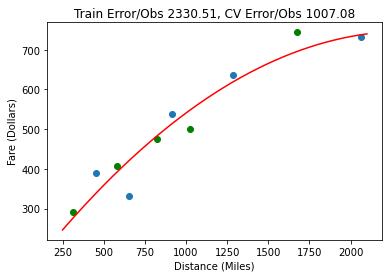

In [5]:
#quadratic fit
X_train = fare_data_train[['Distance','Distance^2']]
y_train = fare_data_train.Fare

X_val = fare_data_validate[['Distance','Distance^2']]
y_val = fare_data_validate.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,X_val,y_val,fare_data_train,fare_data_validate)

#plot quadratic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2
plt.plot(new_x,new_y,color="red")
plt.show()

Note that both the training error and validation error have improved from the linear model, suggesting that the linear model may have been underfitting the data. 

Repeating the process for a cubic fit, we see that the training error continues to improve, but the validation error has significantly increased – this fits the characteristic u-shaped validation error curve with respect to model complexity, and suggests that we have begun to overfit our model.

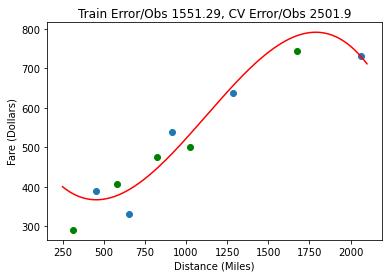

In [6]:
#cubic fit
X_train = fare_data_train[['Distance','Distance^2','Distance^3']]
y_train = fare_data_train.Fare

X_val = fare_data_validate[['Distance','Distance^2','Distance^3']]
y_val = fare_data_validate.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,X_val,y_val,fare_data_train,fare_data_validate)

#plot cubic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2 + model.coef_[2]*new_x**3
plt.plot(new_x,new_y,color="red")
plt.show()

With the quartic fit, our validation error skyrockets, as our training error continues to improve (to a perfect MSE of zero, in fact).

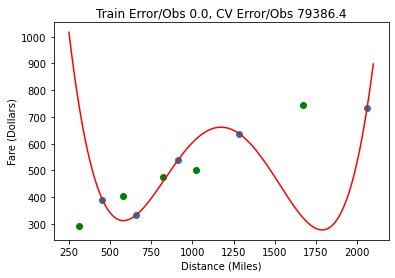

In [7]:
#quartic fit
X_train = fare_data_train[['Distance','Distance^2','Distance^3','Distance^4']]
y_train = fare_data_train.Fare

X_val = fare_data_validate[['Distance','Distance^2','Distance^3','Distance^4']]
y_val = fare_data_validate.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,X_val,y_val,fare_data_train,fare_data_validate)

#plot quartic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2 + model.coef_[2]*new_x**3 + model.coef_[3]*new_x**4
plt.plot(new_x,new_y,color="red")
plt.show()

# Working with Skewed Data

In the code below, we will apply approaches to measuring prediction accuracy with skewed data in Python, using `scikit-learn`. We will work with a skewed version of the Readmission data set from Week 1: data features and outcomes will be the same, but with significantly fewer readmissions.

Using methods from previous lessons, the code below reads in this data, separates it into training and testing data, trains a logistic regression model on the training data, and then plots a confusion matrix on the testing data.

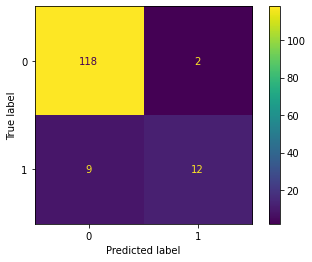

In [8]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
#read data file
readmission_data = pd.read_csv('logreg_readmission_multivariate_skewed.csv')

# seperate data into features and outcomes
X = readmission_data[['Length of Stay']]
y = readmission_data.Readmission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train create and train model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='none')
logistic_model.fit(X_train, y_train)

#plot confusion matrix on testing data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test)
plt.show()

Note that this test data set has a low proportion of data points with a true label of 1 (in other words, readmitted). Suppose we want to evaluate this data using the standard misclassification rate – false positives and negatives over total data points. We can do this using the `confusion_matrix`, similar to what we use to visualize classification performance on other models. 

After we get our predictions `y_pred` from the model, this function allows us to extract true and false positive and negative counts using the `ravel()` function. We can then use this to calculate misclassification rate. This can be converted to an accuracy score by subtracting it from one – we print this score below.

In [9]:
from sklearn.metrics import confusion_matrix

#make model predictions on test set
y_pred = logistic_model.predict(X_test)

#calculate true/false positive/negative rates
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#compute misclassification rate, print correct classification rate
misclassification_error = (fn+fp)/len(y_test)
print(1-misclassification_error)

0.9219858156028369


Note that we can get this same value directly from the classification model by calling the `.score()` method.

In [10]:
print(logistic_model.score(X_test,y_test))

0.9219858156028369


While this score seems high, if we use the same `confusion_matrix` method but plug in all zeros for predictions using the `NumPy` function `zeros`, we see that, surprisingly, we get a comparably high accuracy rate.

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, np.zeros(len(y_test))).ravel()
misclassification_error = (fn+fp)/len(y_test)
print(1-misclassification_error)

0.851063829787234


Luckily, `scikit-learn` has easy to use functions for computing the alternate metrics discussed in an earlier lesson from this week. All of these methods take the test data out comes `y_test`, and the model test predictions `y_pred`. First, we have the precision score, the ratio of true positives to all positives.

In [12]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))

0.8571428571428571


We also have the recall score, the ratio of true positives to true positives plus false negatives.

In [13]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))

0.5714285714285714


Finally, we have the f1-score which effectively combines both these metrics.

In [14]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.6857142857142857


Note that this value is in between the higher precision and lower recall of the model.